In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

import os
import sys

root_repo_dir = os.path.split(os.getcwd())[0]
sys.path.append(root_repo_dir)

from little_things_lib.galaxy import Galaxy

In [2]:
galaxy_model = Galaxy(
    distance_to_galaxy=6100,  # [kpc] Look this up for the galaxy 
    deg_per_pixel=4.17e-4,  # 'CRDELT1' and 'CRDELT2' in the FITS file header (use absolute value)
    image_xdim=150,
    image_ydim=150,
    galaxy_name='DDO46'
)

In [3]:
# change this to the radii array that is output from the Bbarolo fits.
radii = np.loadtxt("/Applications/Astrophysics_Research/DDO46/60 rings/ringlog2.txt", usecols = 0)

v_systemic = 360.8
avg_inclination = 27.9 # deg
avg_pos_angle = 274.1
x_center = 75
y_center = 75

In [4]:
n_radii = len(radii)

tilted_ring_params = {
    'v_systemic': v_systemic,
    'radii': radii,   
    'inclination': [avg_inclination for i in range(n_radii)],
    'position_angle': [avg_pos_angle for i in range(n_radii)],
    'x_pix_center': [x_center for i in range(n_radii)],
    'y_pix_center': [y_center for i in range(n_radii)]
}
galaxy_model.set_tilted_ring_parameters(**tilted_ring_params)

In [5]:
test_rotation_curve = np.loadtxt("/Applications/Astrophysics_Research/DDO46/60 rings/ringlog2.txt", usecols = 2)

test_2d_velocity_field = galaxy_model.create_2d_velocity_field(
    tilted_ring_params['radii'], 
    v_rot = test_rotation_curve  
)

In [6]:
first_mom_file = os.path.join(f"/Users/stephencoffey/Downloads/little-things/data/{galaxy_model.galaxy_name}_1mom.fits")

data = fits.getdata(first_mom_file)
np.set_printoptions(threshold=sys.maxsize)
print(data)

[[      nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan       nan
        nan       nan       nan       nan       nan       nan   

In [7]:
model = test_2d_velocity_field

disc = (model - data)/model

weird = (model - data)/disc

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6735: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6736: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 3., 0., 0., 0., 0.

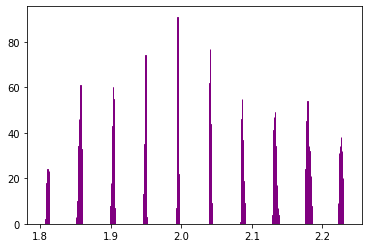

In [8]:
plt.hist(disc, edgecolor = 'purple', label = "(model-data)/model")

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([3., 0., 0., 0., 0., 0.

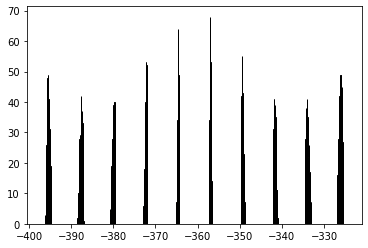

In [9]:
plt.hist(weird, edgecolor = 'black')

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 3., 0., 0., 0., 0.

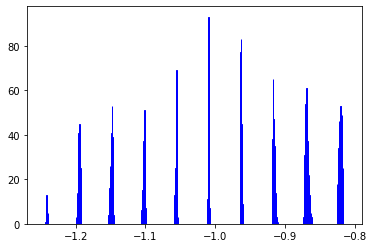

In [10]:
new_disc = model/data
plt.hist(new_disc, edgecolor = "blue")

([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0.

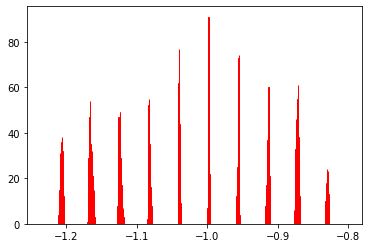

In [11]:
newer_disc = data/model
plt.hist(newer_disc, edgecolor = 'red')